In [ ]:
from IPython.core.display import HTML

HTML(
    """
    <style>

    .usecase-title, .usecase-duration, .usecase-section-header {
      padding-left: 15px;
      padding-bottom: 10px;
      padding-top: 10px;
      padding-right: 15px;
      background-color: #0f9295;
      color: #fff;
      }

    .usecase-title {
      font-size: 1.7em;
      font-weight: bold;
      }

    .usecase-authors, .usecase-level, .usecase-skill {
      padding-left: 15px;
      padding-bottom: 7px;
      padding-top: 7px;
      background-color: #baeaeb;
      font-size: 1.4em;
      color: #121212;
      }

    .usecase-level-skill {
      display: flex;
      }

    .usecase-level, .usecase-skill {
      width: 50%;
      }

    .usecase-duration, .usecase-skill {
      text-align: right;
      padding-right: 15px;
      padding-bottom: 8px;
      font-size: 1.4em;
      }

    .usecase-section-header {
      font-weight: bold;
      font-size: 1.5em;
      }

    .usecase-subsection-header, .usecase-subsection-blurb {
      font-weight: bold;
      font-size: 1.2em;
      color: #121212;
      }

    .usecase-subsection-blurb {
      font-size: 1em;
      font-style: italic;
      }

    </style>
    """)

<div class="usecase-title"><b>Urban Development Analysis</b></div>

<div class="usecase-authors"><b>Authored by: </b> WING SUM WONG/JENNIFER YAU</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python and basic Machine Learning</div>
</div>

<div class="usecase-section-header">Scenario</div>

As a council, I would like to find out the growth and development patterns in the Melbourne city. I would like to find out:

*   Which area of the city has had the most growth in recent years?
*   Which type of developments (residential, hotel, school)?
*   What are the trends in housing developments?
*   Forecast the future development trends.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case, you will:

*   have gained experienced in fetching datasets using APIs
*   understand what CLUE small areas represent
*   become familiar with data extraction, including data collection, consolidation, and initial assessment
*   have gained experience in performing data pre-processing, such as data cleaning and integration
*   have learnt how to visualize observations using mapping visualization techniques
*   become experienced in linear regression analysis
*   have experience with time series model analysis
*   have explored the development growth and forecasted future trends of CLUE small areas

<div class="usecase-section-header">Introduction</div>

To effectively discern trends in building and other commercial spaces development over past years, we adopted three datasets. These datasets encompass various types of data related to developments in dwellings and commercial spaces, including car space.

**DATASETS LIST**

1.   development-activity-monitor
2.   Residential dwellings
3.   Building information

Development Activity Monitor

This dataset tracks the establishment of new commercial and residential spaces, along with their geographic points in the CLUE areas, from 2002 to 2023. Property ID 5 served as unique identifier, known as the Quinary ID. For records lacking a property ID 5, Property ID 4 will be used, and so on, down to property ID.

Residential dwellings

Covering the period from 2002 to 2022, this dataset contains data on dwelling developments in the CLUE areas. It includes residential apartments, house/townhouses, and student accommodations. The Property ID is used as the key identifier in this dataset, acting as a second-tier individual key to uniquely identify properties within the boundary that have the same base property ID.

Building Information

This dataset includes data on accessibility, commercial and residential properties, location and the years of construction completion or refurbishment, ranged from 2002 to 2022. Property ID is used as the key identifier.

# **Part 1  - Import modules & fetch data from Open Data Melbourne**

In [2]:
import requests
import pandas as pd
import os


# define function to fetch data from website using API

def fetch_data(base_url, dataset, api_key, num_records = 99, offset = 0):
    all_records = []
    max_offset = 9900  # Maximum number of requests

    while True:
        # maximum limit check
        if offset > max_offset:
            break

        # Create API request URL
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        # Start request
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        # next cycle offset
        offset += num_records

    # DataFrame all data
    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key: 29ba4e1839b31dc89182c466532dde9a54940da70a97458b78745686


# **Part 2 - Data Cleansing**

## **Dataset:** Development activity monitor

### Load dataset

In [3]:
# get data
DEV_ACTIVITY = 'development-activity-monitor'

df_development = fetch_data(BASE_URL, DEV_ACTIVITY, API_KEY)

df_development.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,None,None,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,Pre May 16,X000459,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,None,None,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,Pre May 16,X000573,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,None,None,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,Pre May 16,X000563,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,None,None,...,0,0,0,0,0,28,0,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,Pre May 16,X000997,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,None,None,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


In [4]:
df_development.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  377
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1239
property_id_3                  1367
property_id_4                  1393
property_id_5                  1404
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

### Data cleaning

#### Fill 'property_id_5' and remove unwanted columns

In [5]:
# save as a new dataset to preserve the original data

df_dev_filled = df_development.copy()

# fill 'property_id_5' with values from 'property_id_4', then 'property_id_3', then 'property_id_2', then 'property_id'

df_dev_filled['property_id_5'] = df_dev_filled['property_id_5'].fillna(df_dev_filled['property_id_4']).fillna(df_dev_filled['property_id_3']).fillna(df_dev_filled['property_id_2']).fillna(df_dev_filled['property_id'])

# drop 'property_id_4' to 'property_id', and other unwanted columns

df_dev_filled.drop(['property_id_4', 'property_id_3', 'property_id_2', 'property_id', 'data_format', 'development_key', 'town_planning_application'], axis = 1, inplace = True)

len(df_dev_filled)

1407

In [6]:
df_dev_filled.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id_5,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


In [7]:
df_dev_filled.isna().sum()

status                           0
year_completed                 377
clue_small_area                  0
clue_block                       0
street_address                   0
property_id_5                    0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

In [8]:
# rename 'property_id_5'
df_dev_filled.rename(columns = {'property_id_5': 'property_id'}, inplace = True)

# check the dataframe
df_dev_filled.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


#### Fix duplicated value in 'property_id_5' if any

In [9]:
# identify duplicates in 'property_id' if any
dup = df_dev_filled[df_dev_filled.duplicated(subset = 'property_id', keep = False)]

# sort these duplicates by 'property_id' and then by 'year_completed' in descending order
dup_sorted = dup.sort_values(by = ['property_id', 'year_completed'], ascending = [True, False])

# display rows where 'property_id' has duplicates
print(dup_sorted)

len(dup_sorted)

         status year_completed               clue_small_area  clue_block  \
1383  COMPLETED           2023  West Melbourne (Residential)         412   
1384  COMPLETED           2023  West Melbourne (Residential)         412   
307   COMPLETED           2019  West Melbourne (Residential)         444   
774   COMPLETED           2019  West Melbourne (Residential)         444   
435    APPROVED           None  West Melbourne (Residential)         111   
...         ...            ...                           ...         ...   
1176  COMPLETED           2017  West Melbourne (Residential)         440   
343   COMPLETED           2023               Melbourne (CBD)          88   
1280  COMPLETED           2023               Melbourne (CBD)          88   
1273  COMPLETED           2023               Melbourne (CBD)          71   
1274  COMPLETED           2023               Melbourne (CBD)          71   

                                       street_address property_id  \
1383  17-37 Abbots

373

In [10]:
# drop duplicates and those are under construnction
# keeping the first (which has the latest year) if years are different

df_dev_clean = df_dev_filled.drop(dup_sorted[dup_sorted.duplicated(subset = 'property_id', keep = 'first')].index)

print(df_dev_clean)

                  status year_completed               clue_small_area  \
0              COMPLETED           2006               North Melbourne   
1              COMPLETED           2005               North Melbourne   
2              COMPLETED           2013  West Melbourne (Residential)   
3              COMPLETED           2014  West Melbourne (Residential)   
4              COMPLETED           2007               North Melbourne   
...                  ...            ...                           ...   
1402  UNDER CONSTRUCTION           None                       Carlton   
1403  UNDER CONSTRUCTION           None                East Melbourne   
1404  UNDER CONSTRUCTION           None                     Southbank   
1405  UNDER CONSTRUCTION           None                East Melbourne   
1406  UNDER CONSTRUCTION           None               North Melbourne   

      clue_block                                     street_address  \
0            342  191-201 Abbotsford Street NORTH ME

In [11]:
## double check if there still have duplicated values in 'property_id'

dup_2 = df_dev_clean[df_dev_clean.duplicated(subset = 'property_id', keep = False)]

In [12]:
print(dup_2)

len(dup_2)

Empty DataFrame
Columns: [status, year_completed, clue_small_area, clue_block, street_address, property_id, floors_above, resi_dwellings, studio_dwe, one_bdrm_dwe, two_bdrm_dwe, three_bdrm_dwe, student_apartments, student_beds, student_accommodation_units, institutional_accom_beds, hotel_rooms, serviced_apartments, hotels_serviced_apartments, hostel_beds, childcare_places, office_flr, retail_flr, industrial_flr, storage_flr, education_flr, hospital_flr, recreation_flr, publicdispaly_flr, community_flr, car_spaces, bike_spaces, longitude, latitude, geopoint]
Index: []

[0 rows x 35 columns]


0

In [13]:
df_dev_clean.isna().sum()

status                           0
year_completed                 268
clue_small_area                  0
clue_block                       0
street_address                   0
property_id                      0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

## **Dataset:** Residential dwellings

### Load dataset

In [14]:
# get data
RES_DWELLINGS = 'residential-dwellings'

df_residential = fetch_data(BASE_URL, RES_DWELLINGS, API_KEY)

df_residential.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2007,222,103736,103736,88-90 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971540,-37.798908,"{'lon': 144.97154018206476, 'lat': -37.7989078..."
1,2007,222,103738,103738,82 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971687,-37.798926,"{'lon': 144.97168673153124, 'lat': -37.7989256..."
2,2007,222,103740,103740,78 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971796,-37.798937,"{'lon': 144.97179564162215, 'lat': -37.7989374..."
3,2007,222,103741,103741,70-76 Faraday Street CARLTON 3053,Carlton,Residential Apartments,6,144.971949,-37.798863,"{'lon': 144.97194949406105, 'lat': -37.7988632..."
4,2007,222,106256,106256,11-13 MacArthur Place South CARLTON 3053,Carlton,House/Townhouse,1,144.972126,-37.798787,"{'lon': 144.97212599710087, 'lat': -37.7987871..."


In [15]:
df_residential.isna().sum()   # check if there are nulls

census_year           0
block_id              0
property_id           0
base_property_id      0
building_address      0
clue_small_area       0
dwelling_type         0
dwelling_number       0
longitude           181
latitude            181
location            181
dtype: int64

In [16]:
len(df_residential)

9999

### Data cleaning

In [17]:
# drop 'base_property_id'
df_res_dropped = df_residential.drop(['base_property_id'], axis = 1)

df_res_dropped.head()

,census_year,block_id,property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2007,222,103736,88-90 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971540,-37.798908,"{'lon': 144.97154018206476, 'lat': -37.7989078..."
1,2007,222,103738,82 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971687,-37.798926,"{'lon': 144.97168673153124, 'lat': -37.7989256..."
2,2007,222,103740,78 Faraday Street CARLTON 3053,Carlton,House/Townhouse,1,144.971796,-37.798937,"{'lon': 144.97179564162215, 'lat': -37.7989374..."
3,2007,222,103741,70-76 Faraday Street CARLTON 3053,Carlton,Residential Apartments,6,144.971949,-37.798863,"{'lon': 144.97194949406105, 'lat': -37.7988632..."
4,2007,222,106256,11-13 MacArthur Place South CARLTON 3053,Carlton,House/Townhouse,1,144.972126,-37.798787,"{'lon': 144.97212599710087, 'lat': -37.7987871..."


In [18]:
# duplicate ID checking on 'property_id'
# if any, keep row with the latest year

# sort dataframe by 'property_id' then 'census_year' (latest year first for each group of 'property_id')
df_res_sorted = df_res_dropped.sort_values(by = ['property_id', 'census_year'], ascending = [True, False])

# drop duplicates in 'property_id', keeping only the row with the latest year in 'census_year'
df_res_cleaned = df_res_sorted.drop_duplicates(subset = 'property_id', keep = 'first')

print(df_res_cleaned)

     census_year  block_id property_id  \
3360        2014       413      100004   
7723        2016       342      100013   
8968        2014       342      100014   
7724        2016       342      100016   
589         2007       342      100017   
...          ...       ...         ...   
7730        2016       342      648126   
6741        2015      2541      650496   
6860        2016        84      650593   
6861        2016        84      650594   
6904        2016       201      668400   

                                       building_address  \
3360        51-57 Abbotsford Street WEST MELBOURNE 3003   
7723     159-161 Abbotsford Street NORTH MELBOURNE 3051   
8968     163-165 Abbotsford Street NORTH MELBOURNE 3051   
7724         169 Abbotsford Street NORTH MELBOURNE 3051   
589      171-173 Abbotsford Street NORTH MELBOURNE 3051   
...                                                 ...   
7730  19 Little Lothian Street South NORTH MELBOURNE...   
6741                   

In [19]:
df_res_cleaned.isna().sum()

census_year           0
block_id              0
property_id           0
building_address      0
clue_small_area       0
dwelling_type         0
dwelling_number       0
longitude           123
latitude            123
location            123
dtype: int64

## **Dataset:** Building information

### Load dataset

In [20]:
# get data
BUILDING_INFO = 'buildings-with-name-age-size-accessibility-and-bicycle-facilities'

df_bldg_info = fetch_data(BASE_URL, BUILDING_INFO, API_KEY)

df_bldg_info.head()

,census_year,block_id,property_id,base_property_id,building_name,street_address,clue_small_area,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers,longitude,latitude,location
0,2014,228,106880,106880,None,70-72 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972117,-37.793685,"{'lon': 144.9721173452, 'lat': -37.79368453039..."
1,2014,228,106883,106883,Tasma,62 Neill Street CARLTON 3053,Carlton,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972425,-37.793659,"{'lon': 144.9724249631, 'lat': -37.79365886526..."
2,2014,228,106885,106885,None,56 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972595,-37.793602,"{'lon': 144.97259491965002, 'lat': -37.7936016..."
3,2014,228,106888,106888,Norwood Cottage,52 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972671,-37.793483,"{'lon': 144.9726713424375, 'lat': -37.7934826073}"
4,2014,228,106890,106890,None,32 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.973168,-37.793332,"{'lon': 144.9731684823, 'lat': -37.79333224992..."


In [21]:
df_bldg_info.isna().sum()   # check if there are nulls

census_year                          0
block_id                             0
property_id                          0
base_property_id                     0
building_name                     7955
street_address                       0
clue_small_area                      0
construction_year                 4576
refurbished_year                  8613
number_of_floors_above_ground        6
predominant_space_use                0
accessibility_type                 829
accessibility_type_description     829
accessibility_rating               829
bicycle_spaces                    5341
has_showers                       9999
longitude                           26
latitude                            26
location                            26
dtype: int64

In [22]:
len(df_bldg_info)

9999

### Data cleaning

In [23]:
# drop 'base_property_id' for 'df_bldg_info' dataset
df_bldg_dropped = df_bldg_info.drop(['base_property_id', 'building_name'], axis = 1)

df_bldg_dropped.head()

,census_year,block_id,property_id,street_address,clue_small_area,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers,longitude,latitude,location
0,2014,228,106880,70-72 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972117,-37.793685,"{'lon': 144.9721173452, 'lat': -37.79368453039..."
1,2014,228,106883,62 Neill Street CARLTON 3053,Carlton,None,None,2.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972425,-37.793659,"{'lon': 144.9724249631, 'lat': -37.79365886526..."
2,2014,228,106885,56 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972595,-37.793602,"{'lon': 144.97259491965002, 'lat': -37.7936016..."
3,2014,228,106888,52 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.972671,-37.793483,"{'lon': 144.9726713424375, 'lat': -37.7934826073}"
4,2014,228,106890,32 Neill Street CARLTON 3053,Carlton,None,None,1.0,House/Townhouse,Not determined or not applicable,Building is not considered to be publicly acce...,0,NaN,None,144.973168,-37.793332,"{'lon': 144.9731684823, 'lat': -37.79333224992..."


In [24]:
# duplicate ID checking on 'property_id'
# if any, keep row with the latest year

# sort dataframe by 'property_id' then 'census_year' (latest year first for each group of 'property_id')
df_bldg_sorted = df_bldg_dropped.sort_values(by = ['property_id', 'census_year'], ascending = [True, False])

# drop duplicates in 'property_id', keeping only the row with the latest year in 'census_year'
df_bldg_cleaned = df_bldg_sorted.drop_duplicates(subset = 'property_id', keep = 'first')

print(df_bldg_cleaned)

     census_year  block_id property_id  \
5886        2021       412      100002   
1227        2014       413      100003   
5887        2021       413      100005   
5372        2021       342      100009   
735         2014       342      100010   
...          ...       ...         ...   
6802        2021       568      712803   
4193        2021        94      713467   
9697        2022       441      714408   
9698        2022       441      714410   
9699        2022       441      714411   

                                         street_address  \
5886    17-37 Abbotsford Street WEST MELBOURNE VIC 3003   
1227        39-49 Abbotsford Street WEST MELBOURNE 3003   
5887    63-65 Abbotsford Street WEST MELBOURNE VIC 3003   
5372  135-141 Abbotsford Street NORTH MELBOURNE VIC ...   
735      143-149 Abbotsford Street NORTH MELBOURNE 3051   
...                                                 ...   
6802              6 Gilbertson Walk KENSINGTON VIC 3031   
4193        143-171 A'B

In [25]:
df_bldg_cleaned.isna().sum()

census_year                          0
block_id                             0
property_id                          0
street_address                       0
clue_small_area                      0
construction_year                 3632
refurbished_year                  6849
number_of_floors_above_ground        4
predominant_space_use                0
accessibility_type                 684
accessibility_type_description     684
accessibility_rating               684
bicycle_spaces                    4278
has_showers                       7950
longitude                           15
latitude                            15
location                            15
dtype: int64

**LIMITATION**


Upon examining the three datasets, it was observed that only the ‘Development Activity Monitor’ dataset includes data on building status. To mitigate the risk of dealing with massive amounts of missing data in the dataset and to simplify the analysis, this study will focus only on the properties whose construction has been completed. Records labelled as under construction or lacking information on the completion year will be excluded.

# **Part 3 - Merging**

### Merge 'Development activity monitor' and 'Residential dwellings'

In [26]:
list(df_dev_clean)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint']

In [27]:
list(df_res_cleaned)

['census_year',
 'block_id',
 'property_id',
 'building_address',
 'clue_small_area',
 'dwelling_type',
 'dwelling_number',
 'longitude',
 'latitude',
 'location']

In [28]:
## skip duplicated columns while merging:
## 'block_id', 'clue_small_area', 'street_address', 'longitude', 'latitude' and 'geopoint'

## dev_exclude = ['street_address', 'longitude', 'latitude', 'geopoint']
## df_dev_selected = df_dev_clean.drop(dev_exclude, axis = 1)

## df_res_selected = df_res_cleaned[['census_year', 'property_id', 'building_address', 'dwelling_type', 'dwelling_number', 'longitude', 'latitude', 'location']]

## ---

df_res_selected = df_res_cleaned[['census_year', 'property_id', 'dwelling_type', 'dwelling_number']]

In [29]:
# inner join

inner_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'inner')

len(inner_dev_res)

241

In [30]:
# outer join

outer_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'outer')

len(outer_dev_res)

7862

In [31]:
# right join

right_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'right')

len(right_dev_res)

6928

In [32]:
# left join

left_dev_res = pd.merge(df_dev_clean, df_res_selected, on = 'property_id', how = 'left')
len(left_dev_res)

1175

In [33]:
list(left_dev_res.columns)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'floors_above',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint',
 'census_year',
 'dwelling_type',
 'dwelling_number']

In [34]:
left_dev_res.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,floors_above,resi_dwellings,studio_dwe,one_bdrm_dwe,...,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,geopoint,census_year,dwelling_type,dwelling_number
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,2,17,0,0,...,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}",2014,Residential Apartments,17.0
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,3,12,0,0,...,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}",NaN,NaN,NaN
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,4,3,0,0,...,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}",2014,Residential Apartments,3.0
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,3,28,0,17,...,0,0,0,28,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}",NaN,NaN,NaN
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,2,0,0,0,...,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}",NaN,NaN,NaN


In [35]:
left_dev_res.isna().sum()

status                           0
year_completed                 268
clue_small_area                  0
clue_block                       0
street_address                   0
property_id                      0
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0
office_flr                       0
retail_flr                       0
industrial_flr                   0
storage_flr                      0
education_flr                    0
hospital_flr                     0
recreation_flr                   0
publicdispaly_flr   

### Merge 'Development & Residential' with 'Building information'

In [36]:
list(df_bldg_cleaned)

['census_year',
 'block_id',
 'property_id',
 'street_address',
 'clue_small_area',
 'construction_year',
 'refurbished_year',
 'number_of_floors_above_ground',
 'predominant_space_use',
 'accessibility_type',
 'accessibility_type_description',
 'accessibility_rating',
 'bicycle_spaces',
 'has_showers',
 'longitude',
 'latitude',
 'location']

In [37]:
# skip column 'floors_above' from dataframe 'left_dev_res'

dev_res_exclude = ['floors_above']
left_dev_res = left_dev_res.drop(dev_res_exclude, axis = 1)

# skip columns from 'df_bldg_cleaned':
# 'census_year', 'block_id', 'street_address', 'clue_small_area', 'longitude', 'latitude' and 'location'

bldg_exclude = ['census_year', 'block_id', 'street_address', 'clue_small_area', 'longitude', 'latitude', 'location']
df_bldg_selected = df_bldg_cleaned.drop(bldg_exclude, axis = 1)

In [38]:
# left join

left_dev_res_bldg = pd.merge(left_dev_res, df_bldg_selected, on = 'property_id', how = 'left')

len(left_dev_res_bldg)

1175

In [39]:
list(left_dev_res_bldg.columns)

['status',
 'year_completed',
 'clue_small_area',
 'clue_block',
 'street_address',
 'property_id',
 'resi_dwellings',
 'studio_dwe',
 'one_bdrm_dwe',
 'two_bdrm_dwe',
 'three_bdrm_dwe',
 'student_apartments',
 'student_beds',
 'student_accommodation_units',
 'institutional_accom_beds',
 'hotel_rooms',
 'serviced_apartments',
 'hotels_serviced_apartments',
 'hostel_beds',
 'childcare_places',
 'office_flr',
 'retail_flr',
 'industrial_flr',
 'storage_flr',
 'education_flr',
 'hospital_flr',
 'recreation_flr',
 'publicdispaly_flr',
 'community_flr',
 'car_spaces',
 'bike_spaces',
 'longitude',
 'latitude',
 'geopoint',
 'census_year',
 'dwelling_type',
 'dwelling_number',
 'construction_year',
 'refurbished_year',
 'number_of_floors_above_ground',
 'predominant_space_use',
 'accessibility_type',
 'accessibility_type_description',
 'accessibility_rating',
 'bicycle_spaces',
 'has_showers']

In [40]:
left_dev_res_bldg.head()

,status,year_completed,clue_small_area,clue_block,street_address,property_id,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,...,dwelling_number,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers
0,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,17,0,0,0,...,17.0,1890,None,2.0,Residential Apartment,Moderate level of accessibility,Main entrance has steps; Alternative entrance ...,2,0.0,None
1,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,12,0,0,0,...,NaN,2005,None,3.0,Residential Apartment,Low level of accessibility,All entrances have steps,1,0.0,None
2,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,3,0,0,0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,28,0,17,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,0,0,0,0,...,NaN,2007,None,2.0,Storage,High level of accessibility,Main Entrance is at grade and has no steps or ...,3,0.0,None


In [41]:
left_dev_res_bldg.isna().sum()   # check if there are nulls

status                               0
year_completed                     268
clue_small_area                      0
clue_block                           0
street_address                       0
property_id                          0
resi_dwellings                       0
studio_dwe                           0
one_bdrm_dwe                         0
two_bdrm_dwe                         0
three_bdrm_dwe                       0
student_apartments                   0
student_beds                         0
student_accommodation_units          0
institutional_accom_beds             0
hotel_rooms                          0
serviced_apartments                  0
hotels_serviced_apartments           0
hostel_beds                          0
childcare_places                     0
office_flr                           0
retail_flr                           0
industrial_flr                       0
storage_flr                          0
education_flr                        0
hospital_flr             

# **Part 4 - Observations**

## CUBE Small Area Trends in Building and Space Constructions


**Aggregation calculation**

In [43]:
# total number of buildings / spaces labelled as 'completed', group by CLUE small area

completed_bldg = left_dev_res_bldg[left_dev_res_bldg['status'] == 'COMPLETED']

selected = ['resi_dwellings', 'student_apartments', 'hotels_serviced_apartments', 'childcare_places', 'car_spaces', 'bike_spaces', 'bicycle_spaces']

grouped_CLUE = completed_bldg.groupby(['clue_small_area', 'year_completed'])[selected].sum(numeric_only = True)

grouped_CLUE

resi_dwellings  \
clue_small_area              year_completed                   
Carlton                      2002                        47   
                             2003                       534   
                             2004                        58   
                             2005                        45   
                             2006                        57   
...                                                     ...   
West Melbourne (Residential) 2019                       607   
                             2020                        27   
                             2021                       144   
                             2022                       145   
                             2023                       493   

                                             student_apartments  \
clue_small_area              year_completed                       
Carlton                      2002                             0   
                             2003                           220   
                             2004                             0   
                             2005                           349   
                             2006                           253   
...                                                         ...   
West Melbourne (Residential) 2019                             0   
                             2020                             0   
                             2021                             0   
                             2022                           308   
                             2023                             0   

                                             hotels_serviced_apartments  \
clue_small_area              year_completed                               
Carlton                      2002                                     0   
                             2003                                     0   
                             2004                                     0   
                             2005                                     0   
                             2006                                     0   
...                                                                 ...   
West Melbourne (Residential) 2019                                     0   
                             2020                                     0   
                             2021                                     0   
                             2022                                   150   
                             2023                                    44   

                                             childcare_places  car_spaces  \
clue_small_area              year_completed                                 
Carlton                      2002                           0           0   
                             2003                           0           0   
                             2004                           0           0   
                             2005                           0           0   
                             2006                           0           0   
...                                                       ...         ...   
West Melbourne (Residential) 2019                           0         368   
                             2020                           0          39   
                             2021                           0          30   
                             2022                           0         224   
                             2023                           0         327   

                                             bike_spaces  bicycle_spaces  
clue_small_area              year_completed                               
Carlton                      2002                      0             7.0  
                             2003                      0             6.0  
                             2004                      0             0.0  


In [44]:
# sum across the rows to get the total sum of the selected columns for each clue_small_area and completed year
grouped_CLUE['total'] = grouped_CLUE.sum(axis = 1)

# reset the index to have `clue_small_area` and `year_completed` as columns
grouped_reset = grouped_CLUE.reset_index()

# select only `clue_small_area` and `year_completed`, and `total` columns for final output
year_bldg_sum = grouped_reset[['clue_small_area', 'year_completed', 'total']]

year_bldg_sum

,clue_small_area,year_completed,total
0,Carlton,2002,54.0
1,Carlton,2003,760.0
2,Carlton,2004,58.0
3,Carlton,2005,433.0
4,Carlton,2006,310.0
...,...,...,...
210,West Melbourne (Residential),2019,1584.0
211,West Melbourne (Residential),2020,88.0
212,West Melbourne (Residential),2021,200.0
213,West Melbourne (Residential),2022,1026.0


### Bar Chart

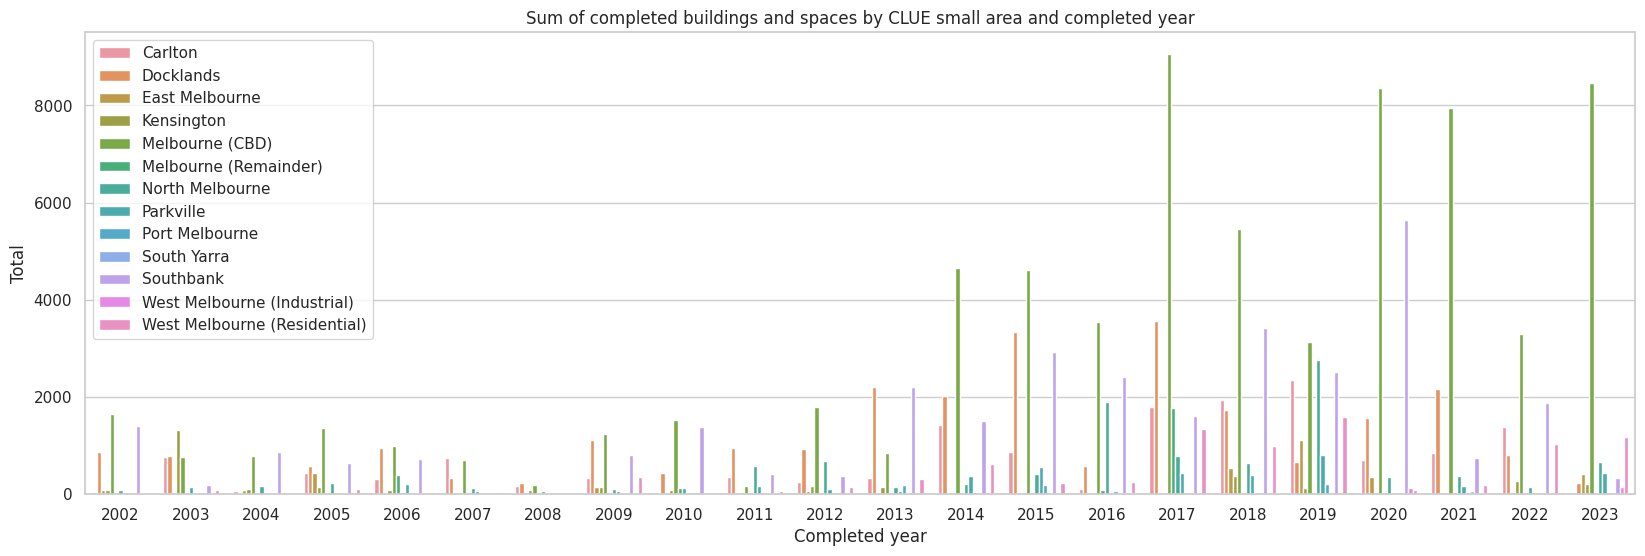

In [45]:
# draw the bar chart

import matplotlib.pyplot as plt
import seaborn as sns

# set style of seaborn
sns.set(style = "whitegrid")

# create a bar plot
plt.figure(figsize = (20, 6))
barplot = sns.barplot(x = 'year_completed', y = 'total', hue = 'clue_small_area', data = year_bldg_sum)

# Set the plot title and labels
plt.title('Sum of completed buildings and spaces by CLUE small area and completed year')
plt.xlabel('Completed year')
plt.ylabel('Total')
plt.legend(loc = 'upper left')

# Display the plot
plt.show()

**Interactive Bar Chart**

In [46]:
!pip install plotly

import plotly.express as px

# interactive bar plot
fig_barChart = px.bar(year_bldg_sum, x = 'year_completed', y = 'total', color = 'clue_small_area',
                      title = 'Sum of completed buildings and spaces by CLUE small area and completed year',
                      labels = {'total': 'Total', 'year': 'Year', 'clue_small_area': 'CLUE small area'})

fig_barChart.update_layout(
    legend = dict(
        yanchor = "top",
        y = 1,
        xanchor = "left",
        x = 0
        ),
    barmode = 'group',
    xaxis_tickangle = -45
    )

# show the plot
fig_barChart.show()

### Choropleth Map

In [47]:
# get CLUE small area data
SMALL_AREA_FOR_CLUE = 'small-areas-for-census-of-land-use-and-employment-clue'

df_sm_area_for_CLUE = fetch_data(BASE_URL, SMALL_AREA_FOR_CLUE, API_KEY)

df_sm_area_for_CLUE

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len
0,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141
1,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449
2,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976
3,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517
4,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304
5,"{'lon': 144.9515603312268, 'lat': -37.78711656...","{'type': 'Feature', 'geometry': {'coordinates'...",Parkville,4050997.2362,9224.56939673
6,"{'lon': 144.96176162794978, 'lat': -37.8252901...","{'type': 'Feature', 'geometry': {'coordinates'...",Southbank,1596010.33174,6012.37723915
7,"{'lon': 144.98292521995853, 'lat': -37.8376070...","{'type': 'Feature', 'geometry': {'coordinates'...",South Yarra,1057773.39715,5424.13644582
8,"{'lon': 144.9825008488323, 'lat': -37.81458116...","{'type': 'Feature', 'geometry': {'coordinates'...",East Melbourne,1909072.65637,6557.91424946
9,"{'lon': 144.9204996881507, 'lat': -37.79152998...","{'type': 'Feature', 'geometry': {'coordinates'...",Kensington,3808797.49677,9407.05542058


In [48]:
!pip install qeds

import geopandas as gpd
import qeds
from shapely.geometry import MultiPolygon


# apply qeds style for plotting if available
try:
    qeds.themes.mpl_style();
except:
    # if qeds style does not work, use a default matplotlib style
    plt.style.use('seaborn')

%matplotlib inline

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 3.5 MB/s eta 0:00:00
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27794 sha256=29bcbbf4bf06a6bf86a6cac8249e0aa8fce64ca39d0d6b60ed6dff9be8536f34
  Stored in directory: /root/.cache/pip/wheels/f7/8e/58/a1e957c3062630764fe2e82fb8424eced72e49df7bcd81d957
Successfully built qeds


<ipython-input-48-2d0973b4df3b>:13: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [49]:
# defiine function to transform the data into a multipolygon
def create_multipolygon(row):

    # extract coordinates from row
    coordinates = row['geometry']['coordinates']

    # create a multipolygon object
    return MultiPolygon(coordinates)

# apply function to transform geo_shape to geometry
df_sm_area_for_CLUE["geometry"] = df_sm_area_for_CLUE["geo_shape"].apply(create_multipolygon)

# create GeoDataFrame
gdf_shapes = gpd.GeoDataFrame(df_sm_area_for_CLUE, geometry = 'geometry')

gdf_shapes.head()

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len,geometry
0,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141,"MULTIPOLYGON (((144.95732 -37.80155, 144.95745..."
1,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449,"MULTIPOLYGON (((144.91999 -37.81910, 144.91960..."
2,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976,"MULTIPOLYGON (((144.90606 -37.82224, 144.91010..."
3,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517,"MULTIPOLYGON (((144.95144 -37.81317, 144.95190..."
4,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304,"MULTIPOLYGON (((144.97322 -37.80776, 144.97129..."


**Map of CLUE small area**

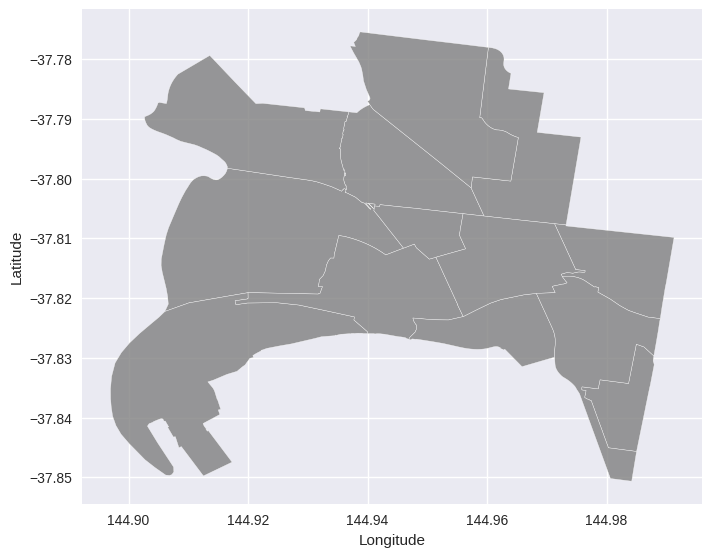

In [50]:
# plotting the map

fig_CLUE, gax = plt.subplots(figsize = (8, 8))

gdf_shapes.plot(ax = gax, edgecolor = 'white', color = 'grey', alpha = 0.8)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')

plt.show()

In [51]:
# sum of each type of buildings / spaces for each CLUE area across all years

CLUE_bldg_totals = completed_bldg.groupby(['clue_small_area'])[selected].sum()

CLUE_bldg_totals['total'] = CLUE_bldg_totals.sum(axis = 1)

CLUE_bldg_totals

,resi_dwellings,student_apartments,hotels_serviced_apartments,childcare_places,car_spaces,bike_spaces,bicycle_spaces,total
clue_small_area,,,,,,,,
Carlton,4826,5547,262,168,1122,2646,713.0,15284.0
Docklands,8657,0,1269,460,7583,4444,3684.0,26097.0
East Melbourne,1073,0,13,0,1567,523,143.0,3319.0
Kensington,2684,0,0,100,446,290,30.0,3550.0
Melbourne (CBD),27301,6271,7864,576,13470,12553,2561.0,70596.0
Melbourne (Remainder),1047,0,100,0,698,284,304.0,2433.0
North Melbourne,3650,1268,92,280,2929,2101,491.0,10811.0
Parkville,1115,606,0,116,671,799,636.0,3943.0
Port Melbourne,1,0,0,0,804,44,57.0,906.0


In [52]:
# merge with 'CLUE_bldg_totals' dataframe

geo_total = gdf_shapes.merge(CLUE_bldg_totals, left_on = 'featurenam', right_on = 'clue_small_area')

geo_total

,geo_point_2d,geo_shape,featurenam,shape_area,shape_len,geometry,resi_dwellings,student_apartments,hotels_serviced_apartments,childcare_places,car_spaces,bike_spaces,bicycle_spaces,total
0,"{'lon': 144.94506274103145, 'lat': -37.7984489...","{'type': 'Feature', 'geometry': {'coordinates'...",North Melbourne,2408377.21789,7546.64919141,"MULTIPOLYGON (((144.95732 -37.80155, 144.95745...",3650,1268,92,280,2929,2101,491.0,10811.0
1,"{'lon': 144.9221537804208, 'lat': -37.80962130...","{'type': 'Feature', 'geometry': {'coordinates'...",West Melbourne (Industrial),5917883.21599,11793.960449,"MULTIPOLYGON (((144.91999 -37.81910, 144.91960...",0,0,0,0,188,105,55.0,348.0
2,"{'lon': 144.91223395712774, 'lat': -37.8318317...","{'type': 'Feature', 'geometry': {'coordinates'...",Port Melbourne,5470092.78821,15117.7233976,"MULTIPOLYGON (((144.90606 -37.82224, 144.91010...",1,0,0,0,804,44,57.0,906.0
3,"{'lon': 144.9416850851487, 'lat': -37.81851829...","{'type': 'Feature', 'geometry': {'coordinates'...",Docklands,2856028.73238,9588.24778517,"MULTIPOLYGON (((144.95144 -37.81317, 144.95190...",8657,0,1269,460,7583,4444,3684.0,26097.0
4,"{'lon': 144.966376105915, 'lat': -37.796011677...","{'type': 'Feature', 'geometry': {'coordinates'...",Carlton,2724820.83121,9914.977304,"MULTIPOLYGON (((144.97322 -37.80776, 144.97129...",4826,5547,262,168,1122,2646,713.0,15284.0
5,"{'lon': 144.9515603312268, 'lat': -37.78711656...","{'type': 'Feature', 'geometry': {'coordinates'...",Parkville,4050997.2362,9224.56939673,"MULTIPOLYGON (((144.94037 -37.78762, 144.94007...",1115,606,0,116,671,799,636.0,3943.0
6,"{'lon': 144.96176162794978, 'lat': -37.8252901...","{'type': 'Feature', 'geometry': {'coordinates'...",Southbank,1596010.33174,6012.37723915,"MULTIPOLYGON (((144.95600 -37.82310, 144.95808...",15944,0,2306,0,6604,3605,3554.0,32013.0
7,"{'lon': 144.98292521995853, 'lat': -37.8376070...","{'type': 'Feature', 'geometry': {'coordinates'...",South Yarra,1057773.39715,5424.13644582,"MULTIPOLYGON (((144.98502 -37.84568, 144.98399...",83,0,0,0,94,9,10.0,196.0
8,"{'lon': 144.9825008488323, 'lat': -37.81458116...","{'type': 'Feature', 'geometry': {'coordinates'...",East Melbourne,1909072.65637,6557.91424946,"MULTIPOLYGON (((144.97322 -37.80776, 144.97319...",1073,0,13,0,1567,523,143.0,3319.0
9,"{'lon': 144.9204996881507, 'lat': -37.79152998...","{'type': 'Feature', 'geometry': {'coordinates'...",Kensington,3808797.49677,9407.05542058,"MULTIPOLYGON (((144.93687 -37.78884, 144.93667...",2684,0,0,100,446,290,30.0,3550.0


**Choropleth Map**

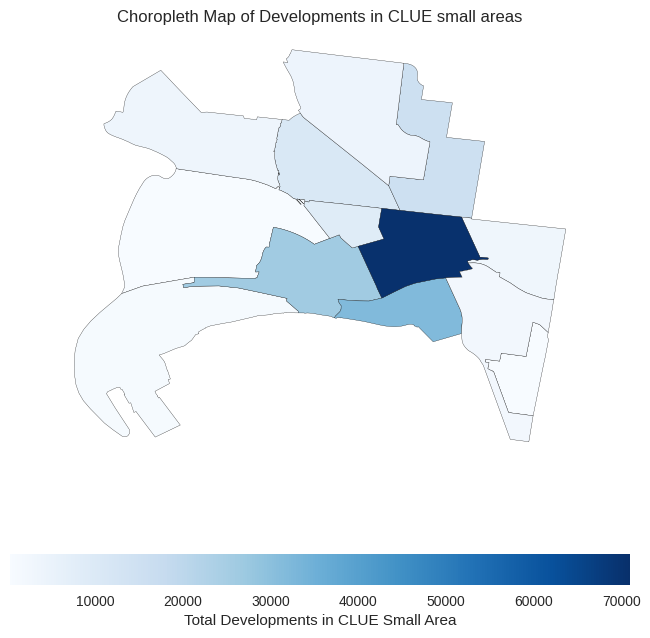

In [53]:
fig_choroplethmap, ax = plt.subplots(1, 1, figsize = (8, 8))

geo_total.plot(
    column = 'total',
    ax = ax,
    legend = True,
    cmap = 'Blues',
    vmin = 300,
    vmax = 71000,
    legend_kwds = {
        'label': "Total Developments in CLUE Small Area",
        'orientation': "horizontal"
        },
    linewidth = 0.2,
    edgecolor = 'black')

# remove the axis
ax.set_axis_off()

ax.set_title("Choropleth Map of Developments in CLUE small areas")

plt.show()

**Interactive Choropleth Map**

In [54]:
!pip install folium

import folium
from folium.features import GeoJsonTooltip

In [55]:
# convert the GeoDataFrame to GeoJSON format
geojson = geo_total.to_json()

# use central point to create a base map
map_center = [geo_total['geo_point_2d'][0]['lat'], geo_total['geo_point_2d'][0]['lon']]
I_cMap = folium.Map(location = map_center, zoom_start = 13)

# define the fields to include in the tooltip
tooltip_fields = ['featurenam', 'total']

# add the choropleth layer
I_choropleth = folium.Choropleth(
    geo_data = geojson,
    name = 'choropleth',
    data = geo_total,
    columns = ['featurenam', 'total'],
    key_on = 'feature.properties.featurenam',
    fill_color = 'PuBuGn',
    fill_opacity = 0.7,
    line_opacity = 1,
    legend_name = 'Total Developments in CLUE small areas'
).add_to(I_cMap)

# create a GeoJsonTooltip
tooltip = GeoJsonTooltip(
    fields = tooltip_fields,
    aliases = ['CLUE area: ', 'Total Developments: '],  # These are the labels for the tooltip
    localize = True,
    sticky = False,
    labels = True,
    style = """
      background-color: #F0EFEF;
      border: 2px solid black;
      border-radius: 3px;
      box-shadow: 3px;
      """,
    max_width=800,
)

# add the tooltip to the choropleth layer
I_choropleth.geojson.add_child(tooltip)

# add a layer control
folium.LayerControl().add_to(I_cMap)

# display the map
I_cMap

### Treemap

In [56]:
# melting the dataframe into a long format suitable for the treemap
CLUE_totals_long = geo_total.melt(
    id_vars = ['featurenam'],
    value_vars = ['resi_dwellings',
                  'student_apartments',
                  'hotels_serviced_apartments',
                  'childcare_places',
                  'car_spaces',
                  'bike_spaces',
                  'bicycle_spaces'],
    var_name = 'DevelopmentType',
    value_name = 'Count'
    )

# creating the treemap
fig_tree = px.treemap(CLUE_totals_long,
                      path = ['featurenam', 'DevelopmentType'],
                      values = 'Count'
                      )

fig_tree.update_layout(
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    title = {'text': "Treemap of Developments by CLUE areas",
             'y': 0.93,
             'x': 0.5,
             'xanchor': 'center',
             'yanchor': 'top'
             }
    )

# Show the figure
fig_tree.show()

In [57]:
CLUE_totals_long.head()

,featurenam,DevelopmentType,Count
0,North Melbourne,resi_dwellings,3650.0
1,West Melbourne (Industrial),resi_dwellings,0.0
2,Port Melbourne,resi_dwellings,1.0
3,Docklands,resi_dwellings,8657.0
4,Carlton,resi_dwellings,4826.0


## Growth Patterns in Housing Developments

**Aggregation Calculation**

In [58]:
# sum of residential dwellings (residential dwellings & student apartments) for each CLUE area across all years

grouped_CLUE_res = grouped_CLUE.groupby(['clue_small_area', 'year_completed'])[['resi_dwellings', 'student_apartments']].sum()

grouped_CLUE_res['total'] = grouped_CLUE_res.sum(axis = 1)

grouped_CLUE_res

resi_dwellings  \
clue_small_area              year_completed                   
Carlton                      2002                        47   
                             2003                       534   
                             2004                        58   
                             2005                        45   
                             2006                        57   
...                                                     ...   
West Melbourne (Residential) 2019                       607   
                             2020                        27   
                             2021                       144   
                             2022                       145   
                             2023                       493   

                                             student_apartments  total  
clue_small_area              year_completed                             
Carlton                      2002                             0     47  
                             2003                           220    754  
                             2004                             0     58  
                             2005                           349    394  
                             2006                           253    310  
...                                                         ...    ...  
West Melbourne (Residential) 2019                             0    607  
                             2020                             0     27  
                             2021                             0    144  
                             2022                           308    453  
                             2023                             0    493  

[215 rows x 3 columns]

### Line Chart

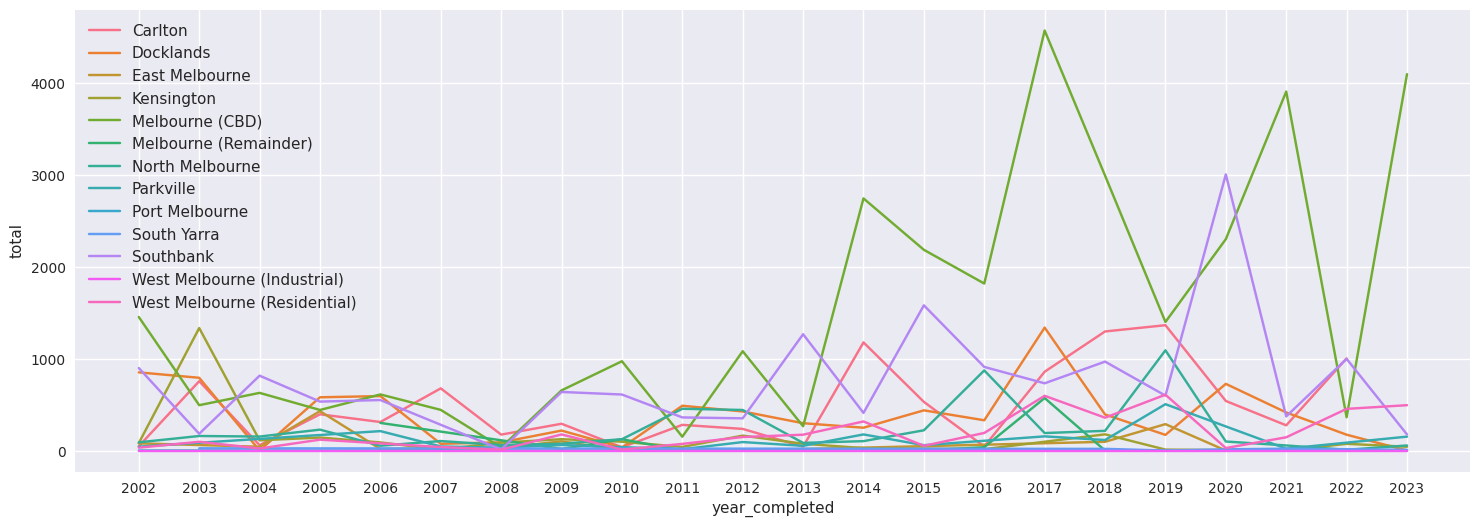

In [59]:
# create the figure and specify the size
fig_line = plt.subplots(figsize = (18, 6))

# plot the data
sns.lineplot(x = 'year_completed', y = 'total', hue = 'clue_small_area', data = grouped_CLUE_res)

# set theme
sns.set_theme(style = 'whitegrid')

# move legend
plt.legend(loc = 'upper left')

plt.show()

**Interactive Line Chart**

In [60]:
# create interactive line plot
fig_line_interactive = px.line(grouped_CLUE_res.reset_index(), x = 'year_completed', y = 'total', color = 'clue_small_area', title = 'Trends in Housing Developments Over the Years')

# improve layout
fig_line_interactive.update_layout(
    title = {
        'text': 'Trends in Housing Developments Over the Years',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    hovermode = 'closest',  # show tooltip for the closest point
    legend_title_text = 'clue_small_area'
)

# Show the plot
fig_line_interactive.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# df_dev_filled.to_csv('/content/gdrive/My Drive/Colab Notebooks/df_dev_filled.csv', index = False)

# Part 5 - Forecast

## Linear Regression

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [103]:
left_dev_res_bldg

,status,year_completed,clue_small_area,clue_block,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,construction_year,refurbished_year
0,2,2006-01-01,6,342,17,0,0,0,0,0,...,0,0,0,0,0,0,144.945030,-37.802822,1890,2004.5
1,2,2005-01-01,6,333,12,0,0,0,0,0,...,0,0,0,0,0,0,144.945947,-37.802049,2005,2004.5
2,2,2013-01-01,12,414,3,0,0,0,3,0,...,0,0,0,0,0,0,144.944719,-37.806791,2002.0,2004.5
3,2,2014-01-01,12,409,28,0,17,11,0,0,...,0,0,0,0,0,28,144.942096,-37.806072,2002.0,2004.5
4,2,2007-01-01,6,1012,0,0,0,0,0,0,...,0,0,0,0,0,0,144.939286,-37.800374,2007,2004.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,3,2012-01-01,0,245,36,0,0,20,16,0,...,0,0,0,0,56,137,144.964800,-37.802300,2002.0,2004.5
1171,3,2012-01-01,2,620,23,0,0,12,11,0,...,0,0,0,0,35,25,144.982577,-37.809940,2002.0,2004.5
1172,3,2012-01-01,10,807,372,0,140,161,71,0,...,0,0,0,0,111,153,144.959900,-37.825000,2002.0,2004.5
1173,3,2012-01-01,2,621,14,0,0,3,11,0,...,0,0,0,0,58,39,144.978950,-37.809569,2002.0,2004.5


### Data Clean and Pre-processing

In [ ]:
### Data Clean and Pre-processing

In [171]:
# handle missing column for "year_completed" with median
left_dev_res_bldg['year_completed'].fillna(left_dev_res_bldg['year_completed'].median(), inplace=True)

In [64]:
# handle missing column for "construction_year" with median
left_dev_res_bldg['construction_year'].fillna(left_dev_res_bldg['construction_year'].median(), inplace=True)

# handle missing column for "refurbished_year" with median
left_dev_res_bldg['refurbished_year'].fillna(left_dev_res_bldg['refurbished_year'].median(), inplace=True)

In [65]:
# drop column "census_year", "dweliing_type", "dweliing_number", "has_showers" , "number_of_floors_above_ground "
left_dev_res_bldg.drop('census_year', axis=1, inplace=True)

In [66]:
left_dev_res_bldg.drop('street_address', axis=1, inplace=True)
left_dev_res_bldg.drop('geopoint', axis=1, inplace=True)
left_dev_res_bldg.drop('dwelling_type', axis=1, inplace=True)
left_dev_res_bldg.drop('dwelling_number', axis=1, inplace=True)
left_dev_res_bldg.drop('has_showers', axis=1, inplace=True)
left_dev_res_bldg.drop('property_id', axis=1, inplace=True)

In [67]:
left_dev_res_bldg.drop('number_of_floors_above_ground', axis=1, inplace=True)
left_dev_res_bldg.drop('predominant_space_use', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_type', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_type_description', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_rating', axis=1, inplace=True)
left_dev_res_bldg.drop('bicycle_spaces', axis=1, inplace=True)

In [68]:
# put column "clue_small_area", "status" into label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
left_dev_res_bldg['clue_small_area'] = labelencoder.fit_transform(left_dev_res_bldg['clue_small_area'])
left_dev_res_bldg['status'] = labelencoder.fit_transform(left_dev_res_bldg['status'])

In [70]:
print(left_dev_res_bldg.describe())

           status  clue_small_area   clue_block  resi_dwellings   studio_dwe  \
count  1175.00000      1175.000000  1175.000000     1175.000000  1175.000000   
mean      1.83234         4.934468   515.790638       76.045957     1.172766   
std       0.55680         3.595373   477.093967      155.239425     9.600181   
min       0.00000         0.000000     1.000000        0.000000     0.000000   
25%       2.00000         2.000000   104.000000        0.000000     0.000000   
50%       2.00000         4.000000   403.000000        2.000000     0.000000   
75%       2.00000         7.000000   781.000000       75.000000     0.000000   
max       3.00000        12.000000  2547.000000     1139.000000   142.000000   

       one_bdrm_dwe  two_bdrm_dwe  three_bdrm_dwe  student_apartments  \
count   1175.000000   1175.000000     1175.000000         1175.000000   
mean      21.468085     26.920000        4.554894           14.221277   
std       60.268907     75.012881       15.842232           

In [94]:
left_dev_res_bldg

,status,year_completed,clue_small_area,clue_block,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,construction_year,refurbished_year
0,2,2006,6,342,17,0,0,0,0,0,...,0,0,0,0,0,0,144.945030,-37.802822,1890,2004.5
1,2,2005,6,333,12,0,0,0,0,0,...,0,0,0,0,0,0,144.945947,-37.802049,2005,2004.5
2,2,2013,12,414,3,0,0,0,3,0,...,0,0,0,0,0,0,144.944719,-37.806791,2002.0,2004.5
3,2,2014,12,409,28,0,17,11,0,0,...,0,0,0,0,0,28,144.942096,-37.806072,2002.0,2004.5
4,2,2007,6,1012,0,0,0,0,0,0,...,0,0,0,0,0,0,144.939286,-37.800374,2007,2004.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,3,2012.0,0,245,36,0,0,20,16,0,...,0,0,0,0,56,137,144.964800,-37.802300,2002.0,2004.5
1171,3,2012.0,2,620,23,0,0,12,11,0,...,0,0,0,0,35,25,144.982577,-37.809940,2002.0,2004.5
1172,3,2012.0,10,807,372,0,140,161,71,0,...,0,0,0,0,111,153,144.959900,-37.825000,2002.0,2004.5
1173,3,2012.0,2,621,14,0,0,3,11,0,...,0,0,0,0,58,39,144.978950,-37.809569,2002.0,2004.5


### Model Training

##### Target variable : resi_dwellings

In [71]:
# group by 'year_completed' and calculate the sum of 'resi_dwellings'
yearly_sum = left_dev_res_bldg.groupby('year_completed')['resi_dwellings'].sum().reset_index()

# rename the column
yearly_sum.rename(columns={'resi_dwellings': 'total_resi_dwellings'}, inplace=True)

In [72]:
# use 'year_completed' and 'total_resi_dwellings'
X = yearly_sum[['year_completed']]
y = yearly_sum['total_resi_dwellings']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 51296152.88078008
[4692.08158037 4815.96952535 4939.85747033 5063.74541532]


In [73]:
# calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.19869236626604403


The MSE is a bit high in the result. In result shows that the prediction for residential dwelling unit will be increasing in the 2024- 2028. The R-squared show negative value which indicate it is a non linear relationship.

#### Target variable : studio_dwe

In [74]:
# group by 'year_completed' and calculate the sum of 'stuido_dwe'
yearly_sum2 = left_dev_res_bldg.groupby('year_completed')['studio_dwe'].sum().reset_index()

# rename the column
yearly_sum2.rename(columns={'studio_dwe': 'total_studio_dwe'}, inplace=True)

In [75]:
# use 'year_completed' and 'total_studio_dwe'
X = yearly_sum2[['year_completed']]
y = yearly_sum2['total_studio_dwe']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 193279.0742803395
[52.53789105 55.47923409 58.42057713 61.36192017]


In [76]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.23752147668584622


The MSE is a bit high in the result.
In result shows that the prediction for studio will be increasing in the 2024- 2028.
The R-squared show negative value which indicate it is a non linear relationship.

#### Target variable : one_bdrm_dwe

In [77]:
# group by 'year_completed' and calculate the sum of 'one_bdrm_dwe'
yearly_sum3 = left_dev_res_bldg.groupby('year_completed')['one_bdrm_dwe'].sum().reset_index()

# rename the column
yearly_sum3.rename(columns={'one_bdrm_dwe': 'total_one_bdrm_dwe'}, inplace=True)

In [78]:
# use 'year_completed' and 'total_one_bdrm_dwe'
X = yearly_sum3[['year_completed']]
y = yearly_sum3['total_one_bdrm_dwe']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 8474168.396512404
[2024.06917476 2124.81796117 2225.56674757 2326.31553398]


In [79]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.15604745855020652


The MSE is a extremely high in the result.
In result shows that the prediction for one bedroom will be increasing in the 2024- 2028.
The R-squared show negative value which indicate it is a non linear relationship.

#### Target variable: two_bdrm_dwe

In [80]:
# group by 'year_completed' and calculate the sum of 'two_bdrm_dwe'
yearly_sum4 = left_dev_res_bldg.groupby('year_completed')['two_bdrm_dwe'].sum().reset_index()

# rename the column
yearly_sum4.rename(columns={'two_bdrm_dwe': 'total_two_bdrm_dwe'}, inplace=True)

In [81]:
# use 'year_completed' and 'total_two_bdrm_dwe'
X = yearly_sum4[['year_completed']]
y = yearly_sum4['total_two_bdrm_dwe']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 11309260.616092715
[2580.43001618 2710.052589   2839.67516181 2969.29773463]


In [82]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.16203884284747816


The MSE is a bit high in the result.
In result shows that the prediction for two bedroom will be increasing in the 2024- 2028.
The R-squared show negative value which indicate it is a non linear relationship.

#### Target variable: three_bdrm_dwe

In [83]:
# group by 'year_completed' and calculate the sum of 'three_bdrm_dwe'
yearly_sum5 = left_dev_res_bldg.groupby('year_completed')['three_bdrm_dwe'].sum().reset_index()

# rename the column
yearly_sum5.rename(columns={'three_bdrm_dwe': 'total_three_bdrm_dwe'}, inplace=True)

In [84]:
# use 'year_completed' and 'total_three_bdrm_dwe'
X = yearly_sum5[['year_completed']]
y = yearly_sum5['total_three_bdrm_dwe']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 761626.0647228225
[429.04692557 451.50809061 473.96925566 496.43042071]


In [85]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.14659453914923692


The MSE is a bit high in the result.
In result shows that the prediction for three bedroom will be increasing in the 2024- 2028.
The R-squared show negative value which indicate it is a non linear relationship.

#### Target variable: student_apartments

In [87]:
# group by 'year_completed' and calculate the sum of 'student_apartments'
yearly_sum6 = left_dev_res_bldg.groupby('year_completed')['student_apartments'].sum().reset_index()

# rename the column
yearly_sum6.rename(columns={'student_apartments': 'total_student_apartments'}, inplace=True)

In [88]:
# use 'year_completed' and 'total_student_apartments'
X = yearly_sum6[['year_completed']]
y = yearly_sum6['total_student_apartments']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# predict future values
future_years = pd.DataFrame({'year_completed': np.arange(2024, 2028)})
future_predictions = model.predict(future_years)
print(future_predictions)

Mean Squared Error: 2107375.279201083
[1213.8013754  1267.47006472 1321.13875405 1374.80744337]


In [89]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -0.07095821158892357


The MSE is extremly high compare with previous result.
In result shows that the prediction for student apartment will be increasing in the 2024- 2028.
The R-squared show negative value which indicate it is a non linear relationship.

In conclusion, the linear model is not suitable for this dataset, therefore we are going to use another model for forecast.

## Time Series Model

### Model Training

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [129]:
left_dev_res_bldg

,status,year_completed,clue_small_area,clue_block,street_address,property_id,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,...,dwelling_number,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers
0,COMPLETED,2006.0,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,17,0,0,0,...,NaN,1890.0,NaN,2.0,Residential Apartment,Moderate level of accessibility,Main entrance has steps; Alternative entrance ...,2.0,0.0,NaN
1,COMPLETED,2005.0,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,12,0,0,0,...,12.0,2005.0,NaN,3.0,Residential Apartment,Low level of accessibility,All entrances have steps,1.0,0.0,NaN
2,COMPLETED,2013.0,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,3,0,0,0,...,3.0,1970.0,NaN,1.0,Wholesale,Not determined or not applicable,Building is not considered to be publicly acce...,0.0,NaN,NaN
3,COMPLETED,2014.0,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,28,0,17,11,...,NaN,1888.0,2014.0,5.0,Residential Apartment,Not determined or not applicable,Configuration of entrance does not fit into an...,0.0,28.0,NaN
4,COMPLETED,2007.0,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,UNDER CONSTRUCTION,NaN,Carlton,245,86-94 Pelham Street CARLTON VIC 3053,107554,36,0,0,20,...,NaN,1983.0,NaN,3.0,Retail - Shop,Low level of accessibility,All entrances have steps,1.0,0.0,NaN
1170,UNDER CONSTRUCTION,NaN,East Melbourne,620,"250-260 Albert Street, East Melbourne, 3002",100361,23,0,0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,UNDER CONSTRUCTION,NaN,Southbank,807,84-90 Queens Bridge Street SOUTHBANK VIC 3006,110440,372,0,140,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,UNDER CONSTRUCTION,NaN,East Melbourne,621,364-370 Albert Street EAST MELBOURNE VIC 3002,100355,14,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
print(left_dev_res_bldg.columns)

Index(['status', 'year_completed', 'clue_small_area', 'clue_block',
       'street_address', 'property_id', 'resi_dwellings', 'studio_dwe',
       'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe', 'student_apartments',
       'student_beds', 'student_accommodation_units',
       'institutional_accom_beds', 'hotel_rooms', 'serviced_apartments',
       'hotels_serviced_apartments', 'hostel_beds', 'childcare_places',
       'office_flr', 'retail_flr', 'industrial_flr', 'storage_flr',
       'education_flr', 'hospital_flr', 'recreation_flr', 'publicdispaly_flr',
       'community_flr', 'car_spaces', 'bike_spaces', 'longitude', 'latitude',
       'geopoint', 'census_year', 'dwelling_type', 'dwelling_number',
       'construction_year', 'refurbished_year',
       'number_of_floors_above_ground', 'predominant_space_use',
       'accessibility_type', 'accessibility_type_description',
       'accessibility_rating', 'bicycle_spaces', 'has_showers'],
      dtype='object')


In [131]:
left_dev_res_bldg.isna().sum()

status                               0
year_completed                     270
clue_small_area                      0
clue_block                           0
street_address                       0
property_id                          0
resi_dwellings                       0
studio_dwe                           0
one_bdrm_dwe                         0
two_bdrm_dwe                         0
three_bdrm_dwe                       0
student_apartments                   0
student_beds                         0
student_accommodation_units          0
institutional_accom_beds             0
hotel_rooms                          0
serviced_apartments                  0
hotels_serviced_apartments           0
hostel_beds                          0
childcare_places                     0
office_flr                           0
retail_flr                           0
industrial_flr                       0
storage_flr                          0
education_flr                        0
hospital_flr             

In [132]:
# handle missing column for "year_completed" with median
left_dev_res_bldg['year_completed'].fillna(left_dev_res_bldg['year_completed'].median(), inplace=True)

In [133]:
# handle missing column for "construction_year" with median
left_dev_res_bldg['construction_year'].fillna(left_dev_res_bldg['construction_year'].median(), inplace=True)

# handle missing column for "refurbished_year" with median
left_dev_res_bldg['refurbished_year'].fillna(left_dev_res_bldg['refurbished_year'].median(), inplace=True)

In [134]:
# drop column "census_year", "dweliing_type", "dweliing_number", "has_showers" , "number_of_floors_above_ground "
left_dev_res_bldg.drop('census_year', axis=1, inplace=True)

In [135]:
left_dev_res_bldg.drop('street_address', axis=1, inplace=True)

In [136]:
left_dev_res_bldg.drop('geopoint', axis=1, inplace=True)

In [137]:
left_dev_res_bldg.drop('dwelling_type', axis=1, inplace=True)

In [138]:
left_dev_res_bldg.drop('dwelling_number', axis=1, inplace=True)

In [139]:
left_dev_res_bldg.drop('has_showers', axis=1, inplace=True)

In [140]:
left_dev_res_bldg.drop('property_id', axis=1, inplace=True)

In [141]:
left_dev_res_bldg.drop('number_of_floors_above_ground', axis=1, inplace=True)
left_dev_res_bldg.drop('predominant_space_use', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_type', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_type_description', axis=1, inplace=True)
left_dev_res_bldg.drop('accessibility_rating', axis=1, inplace=True)
left_dev_res_bldg.drop('bicycle_spaces', axis=1, inplace=True)


In [142]:
# put column "clue_small_area", "status" into label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
left_dev_res_bldg['clue_small_area'] = labelencoder.fit_transform(left_dev_res_bldg['clue_small_area'])
left_dev_res_bldg['status'] = labelencoder.fit_transform(left_dev_res_bldg['status'])

In [143]:
# Print unique values in the 'clue_small_area' column
print(left_dev_res_bldg['clue_small_area'].unique())

[ 6 12  0  5  4 11  9  3  1  7  2 10  8]


['North Melbourne' 'West Melbourne (Residential)' 'Carlton'
 'Melbourne (Remainder)' 'Melbourne (CBD)' 'West Melbourne (Industrial)'
 'South Yarra' 'Kensington' 'Docklands' 'Parkville' 'East Melbourne'
 'Southbank' 'Port Melbourne']

### Target variable : resi_dwellings

#### Clue small area : 0 - Carlton

In [144]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 0

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    63.0
2024-12-31    63.0
2025-12-31    63.0
2026-12-31    63.0
2027-12-31    63.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-144-86a30829a7d4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 1 - Docklands

In [145]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 1

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-145-54aef20e5b95>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 2 - East Melbourne

In [146]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 2

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-146-8c7ba61c858c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 3 - Kensington

In [147]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 3

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    41.0
2025-12-31    41.0
2026-12-31    41.0
2027-12-31    41.0
2028-12-31    41.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-147-e92643057338>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 4 - Melbourne (CBD)

In [148]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 4

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    2061.0
2025-12-31    2061.0
2026-12-31    2061.0
2027-12-31    2061.0
2028-12-31    2061.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-148-8dd6a3d69199>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 5 - Melbourne (Remainder)

In [149]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 5

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2019-12-31    0.0
2020-12-31    0.0
2021-12-31    0.0
2022-12-31    0.0
2023-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-149-0e1a99867458>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 6 - North Melbourne

In [150]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 6

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2024-12-31    55.0
2025-12-31    55.0
2026-12-31    55.0
2027-12-31    55.0
2028-12-31    55.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-150-03d5110d3033>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 7 - Parkville

In [151]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 7

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    151.0
2025-12-31    151.0
2026-12-31    151.0
2027-12-31    151.0
2028-12-31    151.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-151-f2aebc8fefa1>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 8 - Port Melbourne

In [152]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 8

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2023-12-31    0.0
2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-152-581fdca441b7>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 9 - South Yarra

In [153]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 9

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    8.0
2025-12-31    8.0
2026-12-31    8.0
2027-12-31    8.0
2028-12-31    8.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-153-7ef6ff25734e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 10 - Southbank

In [154]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 10

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    175.0
2025-12-31    175.0
2026-12-31    175.0
2027-12-31    175.0
2028-12-31    175.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-154-d236096e2b03>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 11 - West Melbourne(Industrial)

In [155]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 11

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-155-fb25f3d46151>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Clue small area : 12 - West Melbourne(Residential)

In [156]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area
specific_area = 12

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    330.0
2025-12-31    330.0
2026-12-31    330.0
2027-12-31    330.0
2028-12-31    330.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-156-2b51dc146b84>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Target variable : studio_dwe

#### Clue small area : 0 - Carlton

In [157]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 0

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    12.0
2024-12-31    12.0
2025-12-31    12.0
2026-12-31    12.0
2027-12-31    12.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-157-c76a7401194c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 1 - Docklands

In [158]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 1

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-158-36c0f773e870>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 2 - East Melbourne

In [159]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 2

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-159-6a3cb3d2c68e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Clue small area : 3 - Kensington

In [160]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 3

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-160-82a0b3c2c7c4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 4 - Melbourne (CBD)

In [161]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 4

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-161-a67b274e7645>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 5 - Melbourne (Remainder)

In [ ]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 5

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

#### Clue small area : 6 - North Melbourne

In [163]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 6

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-163-e40f6b371331>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 7 - Parkville

In [162]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 7

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    1.232595e-32
2025-12-31    1.232595e-32
2026-12-31    1.232595e-32
2027-12-31    1.232595e-32
2028-12-31    1.232595e-32
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-162-a98d67769ca9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 8 - Pot Melbourne

In [164]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 8

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    0.0
2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-164-654f85cf7d42>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Clue small area : 9 - South Yarra

In [165]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 9

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-165-de6735c51025>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Clue small area : 10 - Southbank

In [167]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 10

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-167-76c2bda4085e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Clue small area : 11 - West Melbourne(Industrial)

In [168]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 11

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-168-86880cdebeb7>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Clue small area : 12 - West Melbourne(Residential)

In [169]:
# Convert 'year_completed' to datetime format for grouping by year
left_dev_res_bldg['year_completed'] = pd.to_datetime(left_dev_res_bldg['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = left_dev_res_bldg.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area
specific_area = 12

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


<ipython-input-169-94bc6f7c702d>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualization

In [170]:
import folium
import pandas as pd
import ipywidgets as widgets
from ipyleaflet import Map, Marker, MarkerCluster
from IPython.display import display

In [173]:
ln

,No,area,Latitude,Longitude,Year,Forecast
0,0,Carlton,37.8808,144.9670,2023,63
1,0,Carlton,37.8808,144.9670,2024,63
2,0,Carlton,37.8808,144.9670,2025,63
3,0,Carlton,37.8808,144.9670,2026,63
4,0,Carlton,37.8808,144.9670,2027,63
...,...,...,...,...,...,...
56,12,West Melbourne (Residential,37.8089,144.9291,2024,330
57,12,West Melbourne (Residential,37.8089,144.9291,2025,330
58,12,West Melbourne (Residential,37.8089,144.9291,2026,330
59,12,West Melbourne (Residential,37.8089,144.9291,2027,330


In [174]:
ln.rename(columns={'Forecast ': 'Forecast'}, inplace=True)

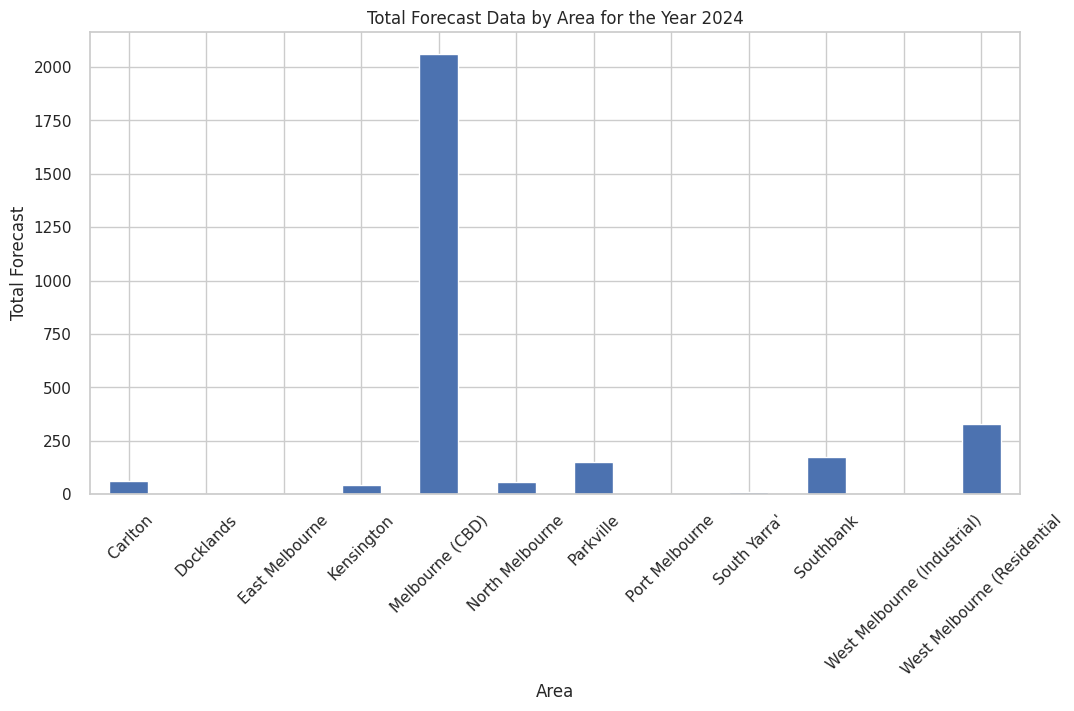

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2024
year_to_plot = 2024
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

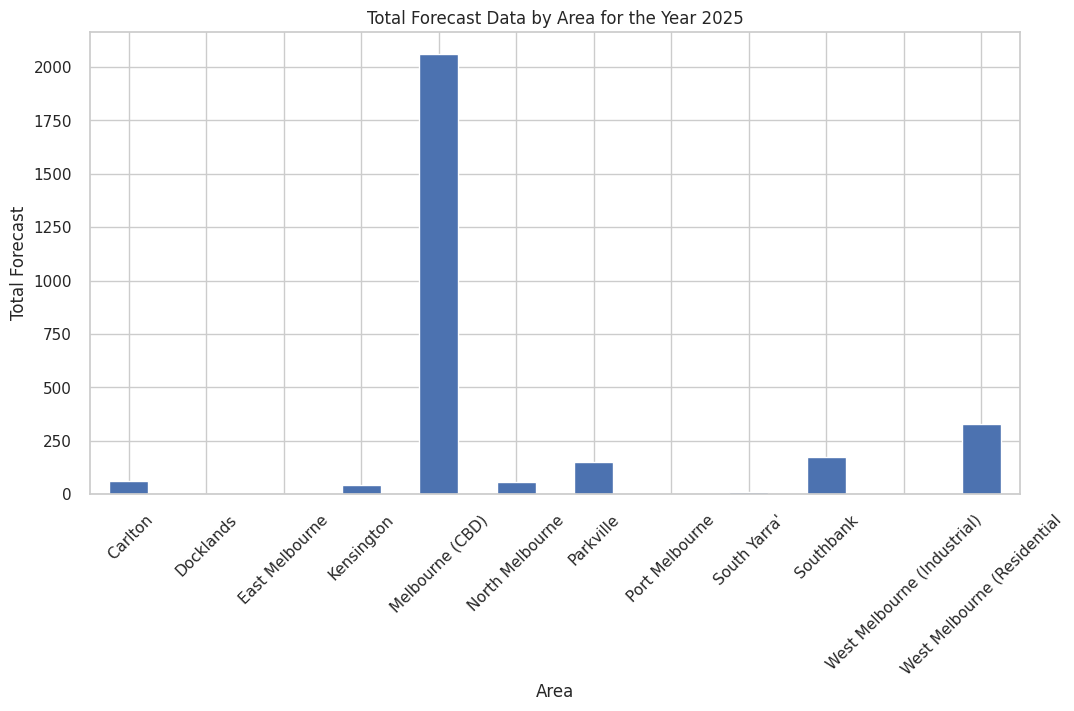

In [177]:
# Filter the data for the year 2025
year_to_plot = 2025
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

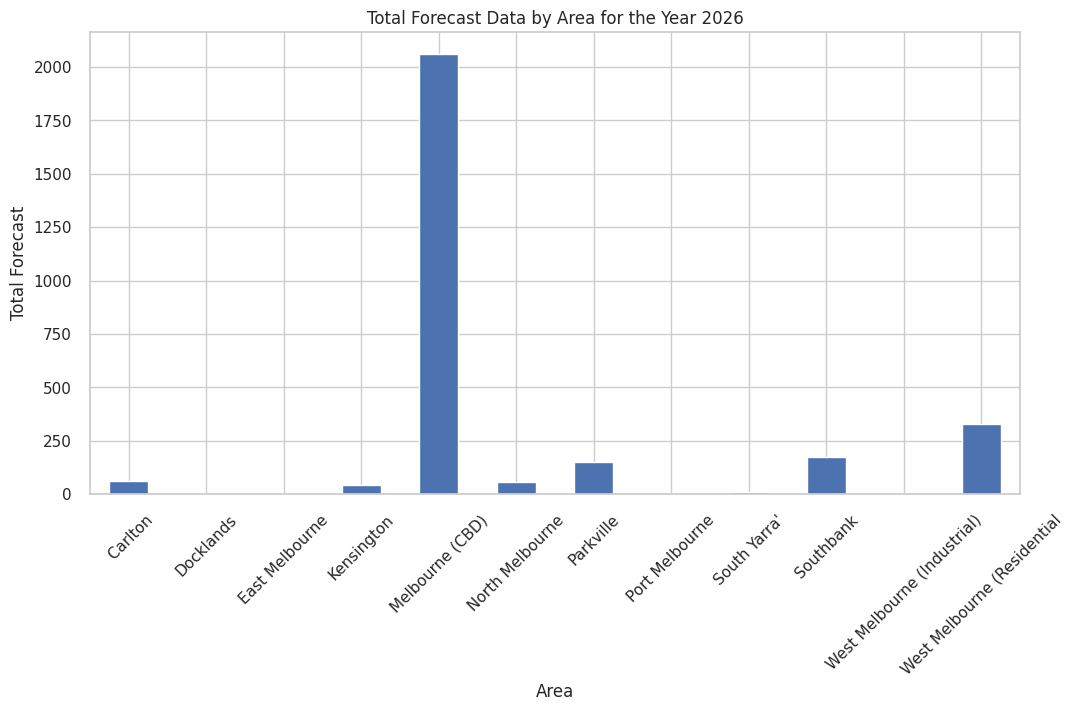

In [178]:
# Filter the data for the year 2026
year_to_plot = 2026
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

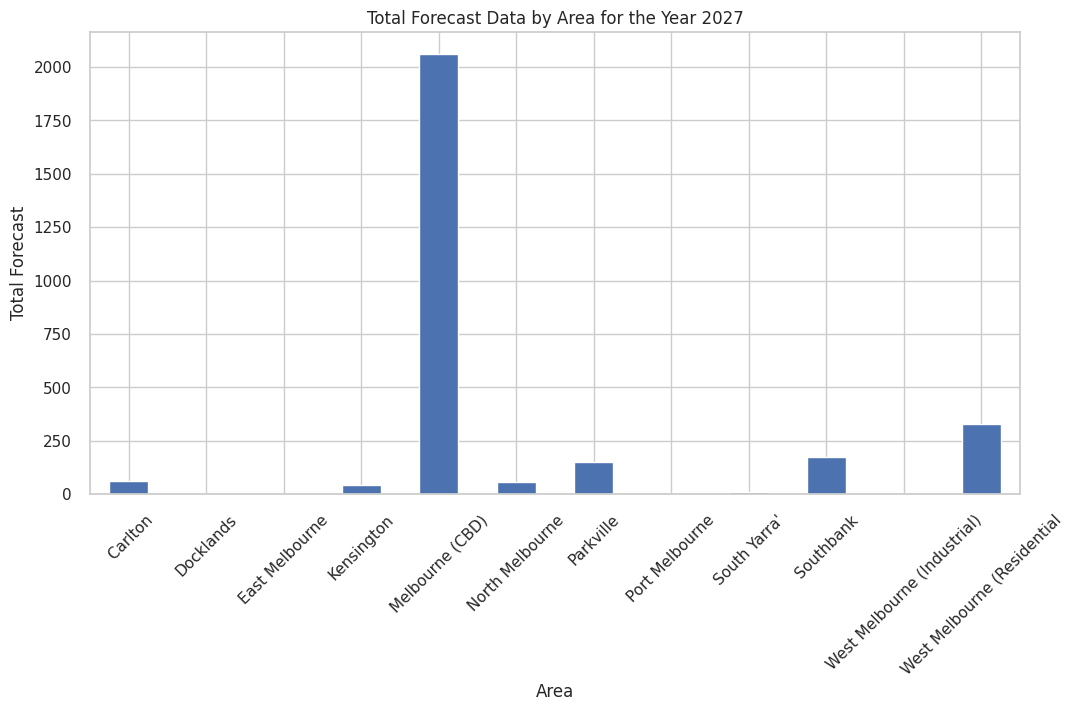

In [179]:
# Filter the data for the year 2027
year_to_plot = 2027
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


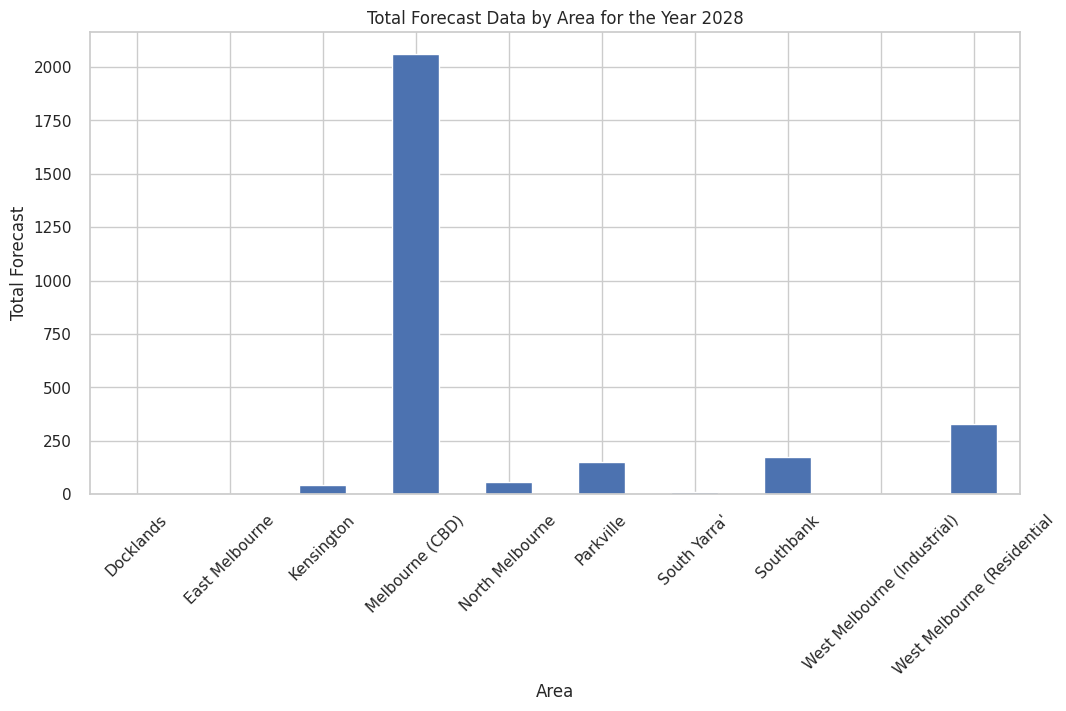

In [180]:
# Filter the data for the year 2028
year_to_plot = 2028
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In result, we can find that for the upcoming five years forecast 2024-2028 Melbourne (CBD) will be the most fastest growth within the area.

# Conclusion

This analysis of the urban development covers the period from 2002 to 2023 and includes only completed developments. Consequently, this scope may not fully capture the comprehensive trends necessary to forecast future developments in the CLUE areas accurately. To enhance the predictive accuracy of the future urban development trends, it would be beneficial to incorporate additional datasets into the model training process. This could include more recent data or projections that consider ongoing and planned developments.